In [1]:
#Import scipy
import scipy as sci
import numpy as np
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate

In [22]:
#Defina a constante de gravitação universal 
G=6.67408e-11 #N-m2/kg2
#Quantidades de referência 
m_nd=1.989e+30 #kg #massa do sol 
r_nd=5.326e+12 #m #distância entre estrelas 1 e 2
v_nd=30000 #m/s #velocidade relativa 
t_nd=1*365*24*3600 #[s] #Período orbital
#Net Constantes 
K1=G*t_nd*m_nd/(r_nd**2*v_nd) 
K2=v_nd*t_nd/r_nd

In [3]:
#Define massas 
m1=10 #Primeira Estrela
m2=10 #Segunda Estrela
#Define os vetores de posição inicial 
r1=[-0.5,0,0] #m 
r2=[0.5,0,0] #m
r3=[0,1,0] #m 
#Converte vetores pos em arrays 
r1=sci.array(r1,dtype="float64") 
r2=sci.array(r2,dtype="float64")
r3=sci.array(r3,dtype="float64")
# Centro de Massa (Center of mass)
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define as velocidades iniciais 
v1=[0.01,0.01,0] #m/s 
v2=[-0.05,0,-0.1] #m/s
v3=[0,-0.01,0] 
#Converte vetores de velocidade em arrays 
v1=sci.array(v1,dtype="float64") 
v2=sci.array(v2,dtype="float64")
v3=sci.array(v3,dtype="float64")
# Encontrando velocidade do Centro de MAssa
v_com=(m1*v1+m2*v2)/(m1+m2)


<ipython-input-3-b7e62973dbf3>:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
<ipython-input-3-b7e62973dbf3>:10: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
<ipython-input-3-b7e62973dbf3>:11: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
<ipython-input-3-b7e62973dbf3>:19: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
<ipython-input-3-b7e62973dbf3>:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
<ipython-input-3-b7e62973dbf3>:21: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use 

In [4]:
# Centro de Massa (Center of mass)
r_com=(m1*r1+m2*r2)/(m1+m2)
# Definindo Velocidades Iniciais
v1=[0.1,0,0.1]
v2=[-0.1,0,-0.1]
# Passando vetores velocidade para matrizes
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
# Encontrando velocidade do Centro de MAssa
v_com=(m1*v1+m2*v2)/(m1+m2)

In [5]:
#Função definindo as equações de movimento 
def EquaçoesdeCorpos(w,t,G,m1,m2):  #Problema de dois corpos
 r1=w[:3]
 r2=w[3:6]
 v1=w[6:9]
 v2=w[9:12]
 r=sci.linalg.norm(r2-r1) # Calcula magnitude do vetor normal
 dv1bydt=K1*m2*(r2-r1)/r**3
 dv2bydt=K1*m1*(r1-r2)/r**3
 dr1bydt=K2*v1
 dr2bydt=K2*v2
 r_derivs=np.concatenate((dr1bydt,dr2bydt))
 derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
 return derivs


In [6]:
# Parametros iniciais
init_params=np.array([r1,r2,v1,v2]) # Matriz de parametros
init_params=init_params.flatten() # Reduzindo para 1D

time_span=np.linspace(0,30,1000) # 30 periodos orbitais e 1000 pontos
# Solucionar EDOs
import scipy.integrate
two_body_sol=sci.integrate.odeint(EquaçoesdeCorpos,init_params,time_span,args=(G,m1,m2))

r1_sol=two_body_sol[:,:3] 
r2_sol=two_body_sol[:,3:6]

# Posição centro de massa
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
# Posição COM estrela 1
r1com_sol=r1_sol-rcom_sol
# Posição COM estrela 2
r2com_sol=r2_sol-rcom_sol


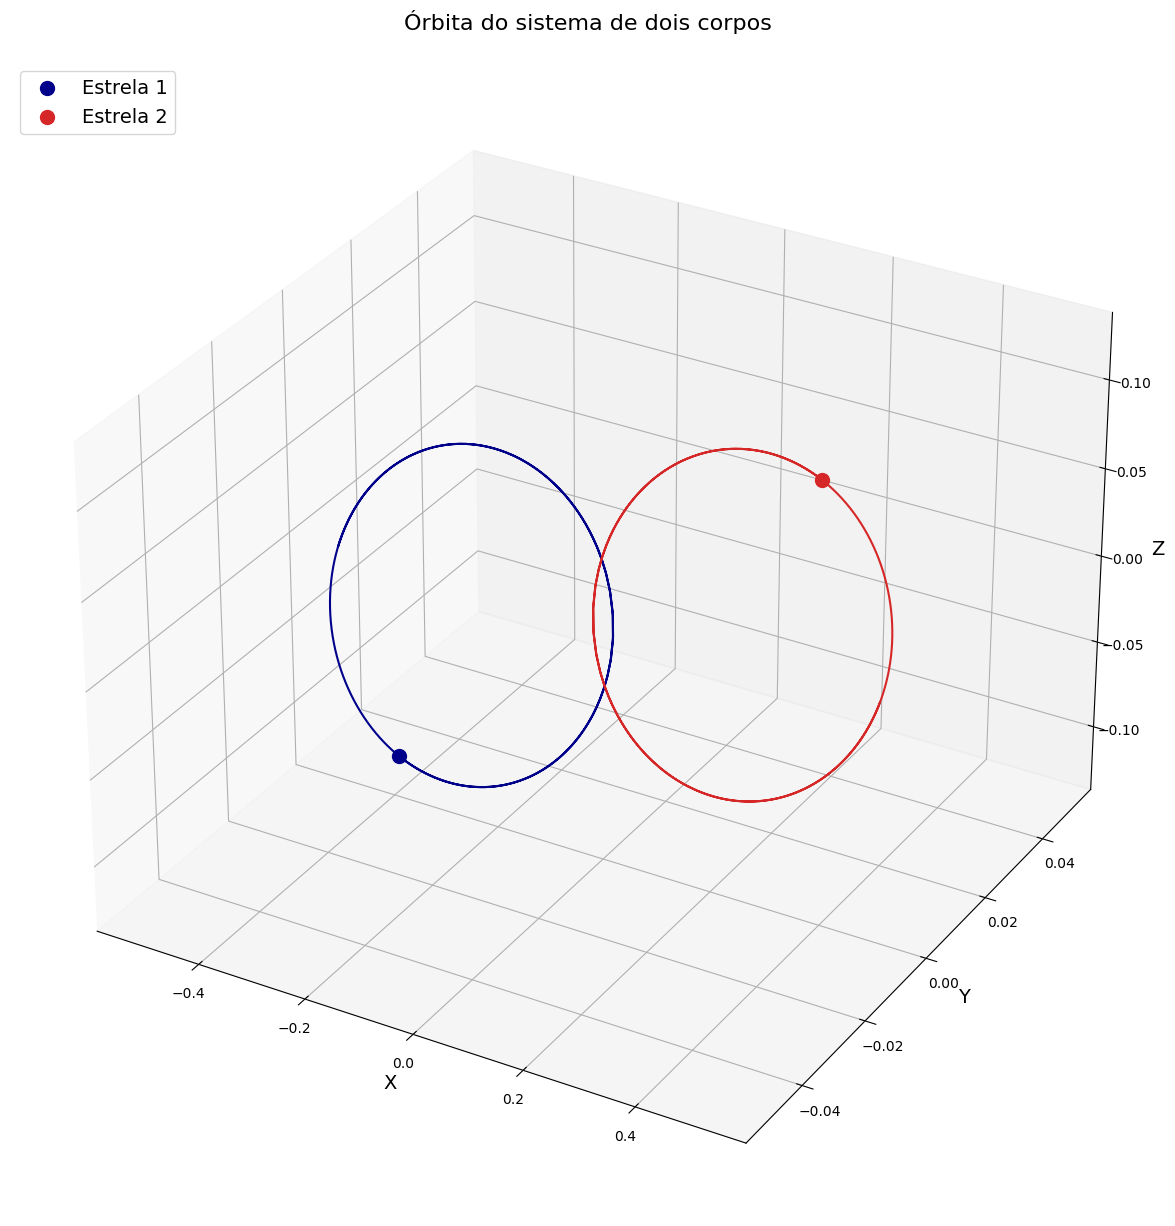

In [7]:
# Criando Figura
fig=plt.figure(figsize=(15,15))
# Eixos 3D
ax=fig.add_subplot(111,projection="3d")
# Plotando orbitas
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
# Plotando posição final das estrelas
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Estrela 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Estrela 2")
# Legendas
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Y",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("Órbita do sistema de dois corpos\n",fontsize=16)
ax.legend(loc="upper left",fontsize=14)

In [8]:
#redefinindo alguns valores
#Define as massas
m1=1.0 #Estrela 1
m2=0.907 #Estrela 2

#Defina a constante de gravitação universal 
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #massa do sol
r_nd=5.326e+12 #m #distância entre estrelas 1 e 2
v_nd=30000 #m/s #velocidade relativa entre a Terra e o Sol
t_nd=79.91*365*24*3600*0.51 #s #Periodo Orbital, estrelas
#Constantes
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define posição inicial dos vetores
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Converte vetores pos em arrays 
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")
# Centro de Massa (Center of mass)
r_com=(m1*r1+m2*r2)/(m1+m2)
#Define as velocidades iniciais 
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Converte vetores de velocidade em arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")
#Encontrando velocidade do Centro de MAssa
v_com=(m1*v1+m2*v2)/(m1+m2)

# Parametros iniciais
init_params=np.array([r1,r2,v1,v2]) # Matriz de parametros
init_params=init_params.flatten() # Reduzindo para 1D

time_span=np.linspace(0,8,500) # 8 periodos orbitais e 500 pontos
# Solucionar EDOs
import scipy.integrate
two_body_sol=sci.integrate.odeint(EquaçoesdeCorpos,init_params,time_span,args=(G,m1,m2))

r1_sol=two_body_sol[:,:3] 
r2_sol=two_body_sol[:,3:6]

# Posição centro de massa
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
# Posição COM estrela 1
r1com_sol=r1_sol-rcom_sol
# Posição COM estrela 2
r2com_sol=r2_sol-rcom_sol



<ipython-input-8-153b888015fd>:21: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
<ipython-input-8-153b888015fd>:22: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
<ipython-input-8-153b888015fd>:29: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
<ipython-input-8-153b888015fd>:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")


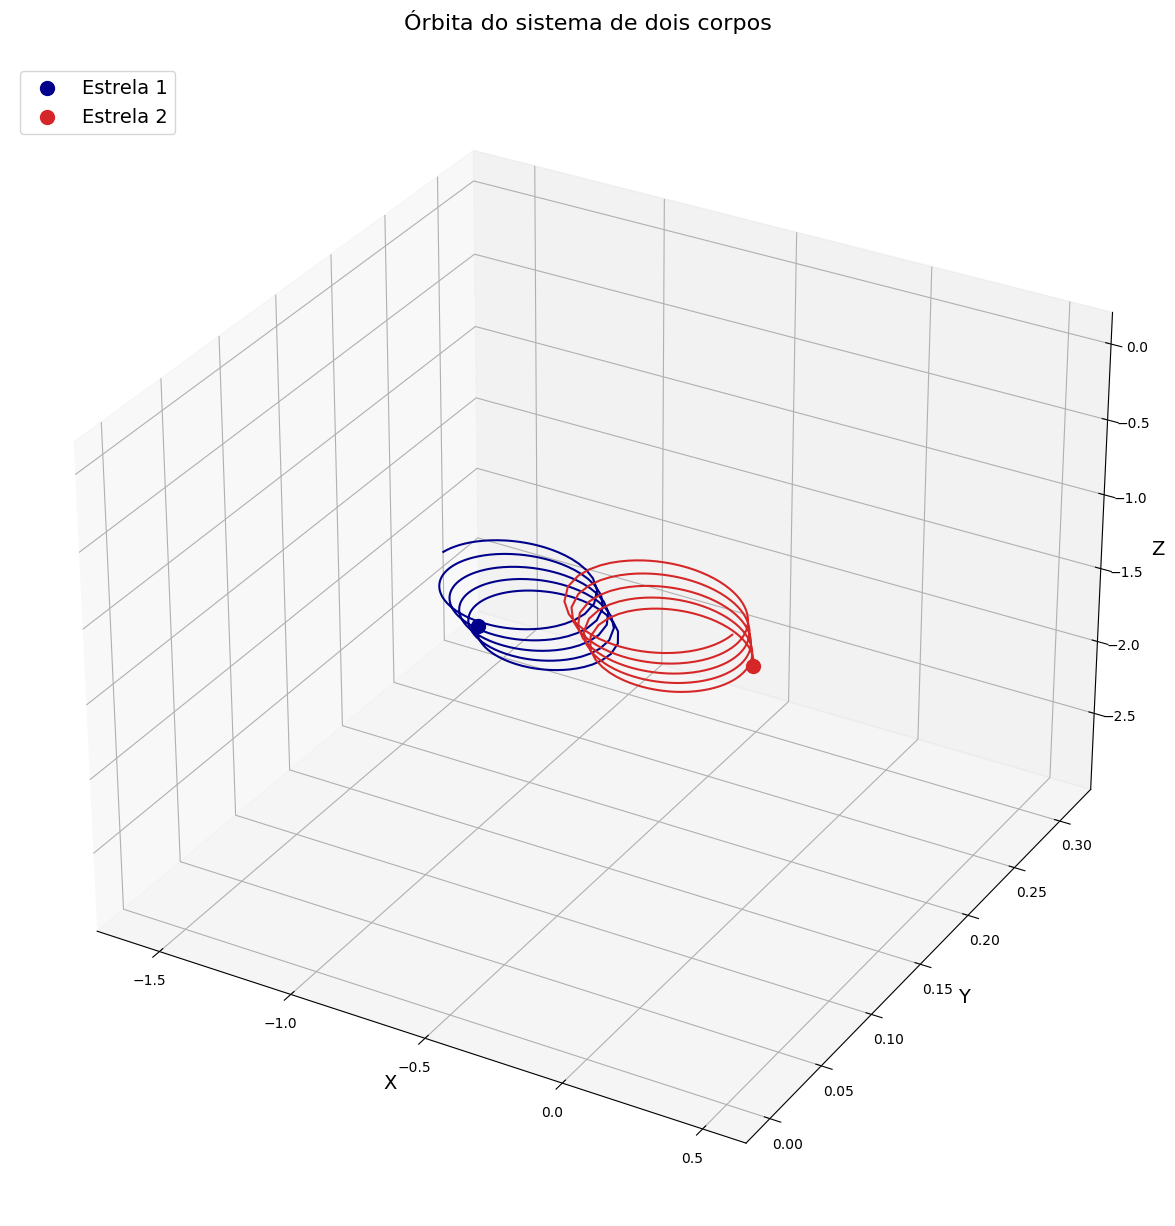

In [9]:
# Criando Figura
fig=plt.figure(figsize=(15,15))
# Eixos 3D
ax=fig.add_subplot(111,projection="3d")
# Plotando orbitas
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
# Plotando posição final das estrelas
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Estrela 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Estrela 2")
# Legendas
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Y",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("Órbita do sistema de dois corpos\n",fontsize=16)
ax.legend(loc="upper left",fontsize=14)

In [16]:
#sendo agora 
m1=1.1 #Primeira Estrela
m2=0.907 #Segunda Estrela
m3=1.0 #Planeta

#Defina a constante de gravitação universal 
G=6.67408e-11 #N-m2/kg2
#Quantidades de referência 
m_nd=1.989e+30 #kg #massa do sol 
r_nd=5.326e+12 #m #distância entre estrelas 1 e 2
v_nd=30000 #m/s #velocidade relativa 
t_nd=1*365*24*3600 #[s] #Período orbital
#Net Constantes 
K1=G*t_nd*m_nd/(r_nd**2*v_nd) 
K2=v_nd*t_nd/r_nd

In [17]:
def TresEquaçoesdeCorpos(w,t,G,m1,m2,m3): #Problema de três corpos
    r1=w[:3] 
    r2=w[3:6] 
    r3=w[6:9] 
    v1=w[9:12] 
    v2=w [12:15] 
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1) 
    r13=sci.linalg.norm(r3-r1) 
    r23=sci.linalg.norm(r3-r2) 
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3 
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3 
    dv3bydt= K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3 
    dr1bydt=K2*v1 
    dr2bydt=K2*v2 
    dr3bydt=K2*v3
    r12_derivs=sci.concatenate((dr1bydt,dr2bydt)) 
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt)) 
    v_derivs=sci.concatenate((v12_derivs,dv3bydt)) 
    derivs= sci.concatenate((r_derivs,v_derivs)) 
    return derivs


In [18]:
#Parâmetros iniciais do pacote 
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Parâmetros iniciais 
init_params=init_params.flatten() #Flatten para fazer array 1D 
time_span=sci.linspace(0,200,500) #200 períodos orbitais e 500 pontos
#Execute o solucionador de ODE 
import scipy.integrate
three_body_sol=sci.integrate.odeint(TresEquaçoesdeCorpos,init_params,time_span,args=(G,m1,m2,m3))
#Defina o centro de massa 
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Encontre a velocidade de COM 
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)


<ipython-input-18-8debbc3c1f95>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Parâmetros iniciais
<ipython-input-18-8debbc3c1f95>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,200,500) #200 períodos orbitais e 500 pontos
<ipython-input-17-5cfcce76d974>:18: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
<ipython-input-17-5cfcce76d974>:19: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((r12_derivs,dr3bydt))
<ipython-input-17-5cfcce76d974>:20: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  v12_derivs=sc

In [19]:
r1_sol=three_body_sol[:,:3] 
r2_sol=three_body_sol[:,3:6] 
r3_sol=three_body_sol[:,6:9]

# Posição centro de massa
rcom_sol=(m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
# Posição COM estrela 1
r1com_sol=r1_sol-rcom_sol
# Posição COM estrela 2
r2com_sol=r2_sol-rcom_sol
# Posição COM Planeta 
r3com_sol=r3_sol-rcom_sol


In [20]:
r1_sol=three_body_sol[:,:3] 
r2_sol=three_body_sol[:,3:6] 
r3_sol=three_body_sol[:,6:9]

#Parâmetros iniciais do pacote 
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Parâmetros iniciais 
init_params=init_params.flatten() #Flatten para fazer array 1D 
time_span=sci.linspace(0,200,500) #200 períodos orbitais e 500 pontos
#Execute o solucionador de ODE 
import scipy.integrate
three_body_sol=sci.integrate.odeint(TresEquaçoesdeCorpos,init_params,time_span,args=(G,m1,m2,m3))

<ipython-input-20-7a731ecd8c93>:6: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Parâmetros iniciais
<ipython-input-20-7a731ecd8c93>:8: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,200,500) #200 períodos orbitais e 500 pontos
<ipython-input-17-5cfcce76d974>:18: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
<ipython-input-17-5cfcce76d974>:19: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((r12_derivs,dr3bydt))
<ipython-input-17-5cfcce76d974>:20: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  v12_derivs=sc

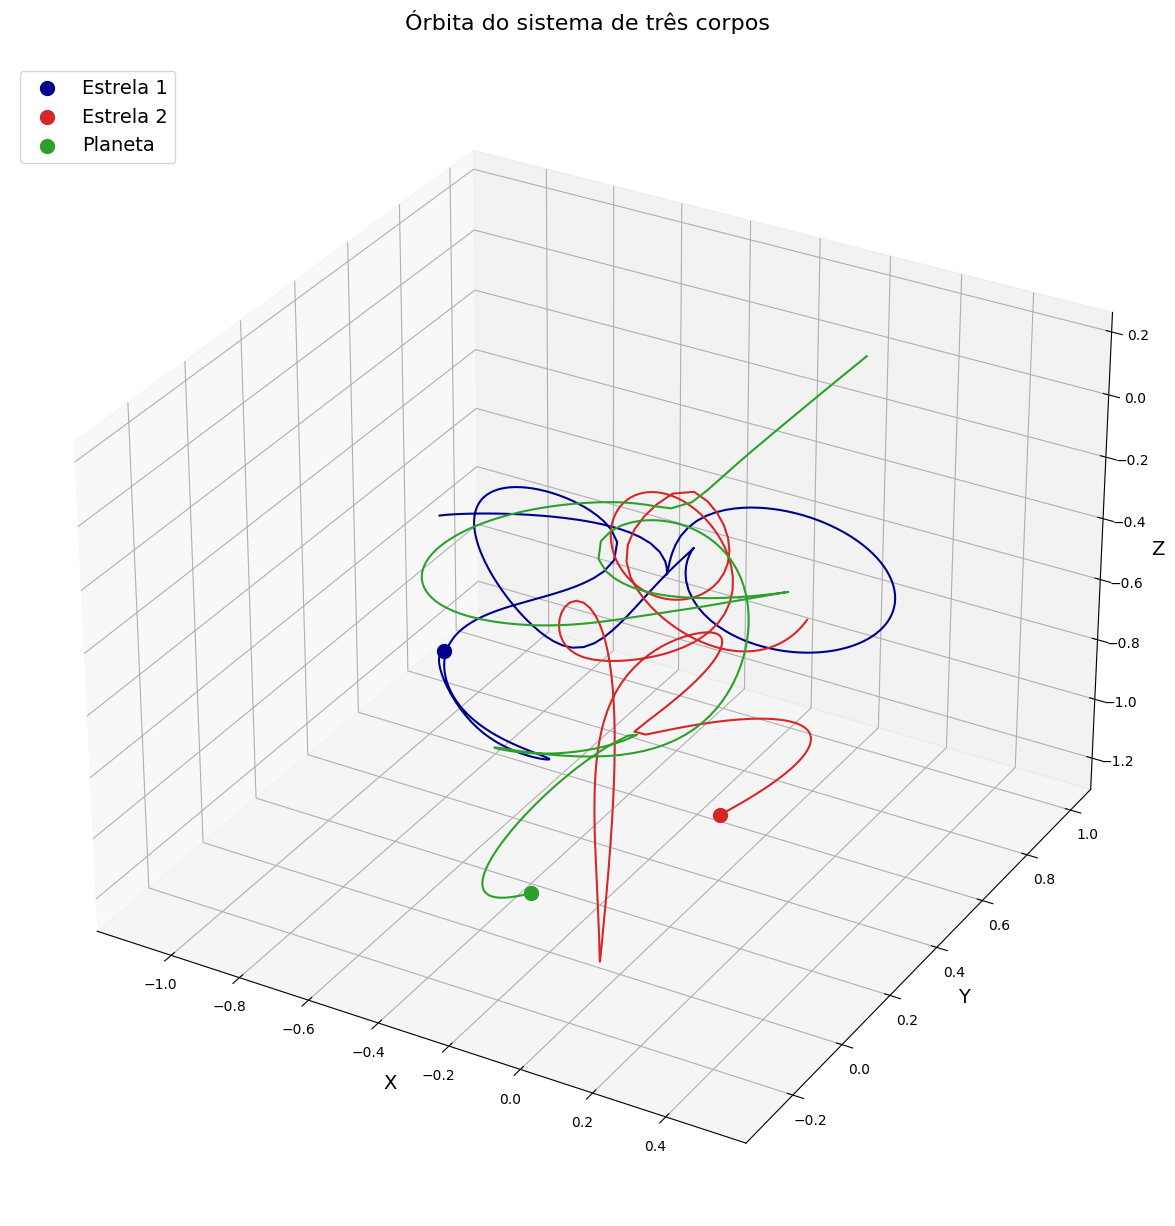

In [21]:
# Criando Figura
fig=plt.figure(figsize=(15,15))
# Eixos 3D
ax=fig.add_subplot(111,projection="3d")
# Plotando orbitas
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")
# Plotando posição final das estrelas
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Estrela 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Estrela 2")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="Planeta")
# Legendas
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Y",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("Órbita do sistema de três corpos\n",fontsize=16)
ax.legend(loc="upper left",fontsize=14)